<a href="https://colab.research.google.com/github/farieu/data-analysis/blob/OutrosModelos/RandomForest_(sem_pipeline).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Treinamento com Random Forest

Esse treinamento é uma nova versão do que estava commitado. A primeira versão do pipeline apresentava vários bugs, e ocasionava na elaboração de um dataset gigantesco, muito diferente do que o que usei para Regressão.

---
Essa nova versão utiliza o GoodReads Encoded, fruto da branch **SelecaoFeatures**, mesmo dataset que usei para treinar o modelo de Regressão.

### Importação de bibliotecas e dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Binarizer, LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BackEnd/Treinamento/GoodReadsEncoded.csv')

### Treinamento sem passar pelo Pipeline de Pré-Processamento

Com o dataset codificado, começo a preparar o treinamento:
dividindo o conjunto em características (features), através

1.   Dividindo o conjunto em X e y
2.  **X**: características/variáveis independentes, que vão servir como entrada para o modelo.
3. **Y**: variável dependente que o modelo está tentando prever, ou seja, a nota do livro.




In [ ]:
X = df.drop(columns=['rating', 'desc'])
y = df['rating']

In [ ]:
print(X.columns)
print(X.head(2))

Index(['author', 'bookformat', 'pages', 'reviews', 'title', 'totalratings',
       '10th Century', '11th Century', '12th Century', '13th Century',
       ...
       'Young Adult Paranormal', 'Young Adult Romance',
       'Young Adult Science Fiction', 'Young Readers', 'Yuri', 'Zambia', 'Zen',
       'Zimbabwe', 'Zombies', 'æ¼«ç”»'],
      dtype='object', length=1185)
   author  bookformat  pages  reviews  title  totalratings  10th Century  \
0   32032          56      0        5   8698            33             0   
1    8446         100    576        6  21651            41             0   

   11th Century  12th Century  13th Century  ...  Young Adult Paranormal  \
0             0             0             0  ...                       0   
1             0             0             0  ...                       0   

   Young Adult Romance  Young Adult Science Fiction  Young Readers  Yuri  \
0                    0                            0              0     0   
1                   

In [ ]:
print(y)
print(y.head(3))

0        3.52
1        4.51
2        4.15
3        3.83
4        3.73
         ... 
84049    3.77
84050    3.97
84051    4.27
84052    3.63
84053    3.83
Name: rating, Length: 84054, dtype: float64
0    3.52
1    4.51
2    4.15
Name: rating, dtype: float64


Conforme mostrado na Preparação do Modelo, precisamos binarizar as notas para treinamento.



*   Avaliações de livros maior ou igual a 4 serão categorizadas como '1' (boa avaliação).
*   Avaliações menores que 4 serão categorizadas como '0' (má avaliação)



In [ ]:
binarizer = Binarizer(threshold=4.0)
y_binary = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()
print(y_binary)

[0. 1. 1. ... 1. 0. 0.]


Agora, precisamos separar os conjuntos de treino e de teste. Para a **Random Forest**, será divido em:

1.   **80% para Treinamento**
2.   **20% para Teste**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

Instanciamento do Random Forest, treinamento e avaliação do modelo.

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Avaliar o desempenho do modelo, relatório de classificação e matriz de confusão.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

Acurácia do modelo: 0.73

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.74      0.86      0.80     10380
         1.0       0.70      0.52      0.60      6431

    accuracy                           0.73     16811
   macro avg       0.72      0.69      0.70     16811
weighted avg       0.73      0.73      0.72     16811


Matriz de Confusão:
 [[8937 1443]
 [3082 3349]]


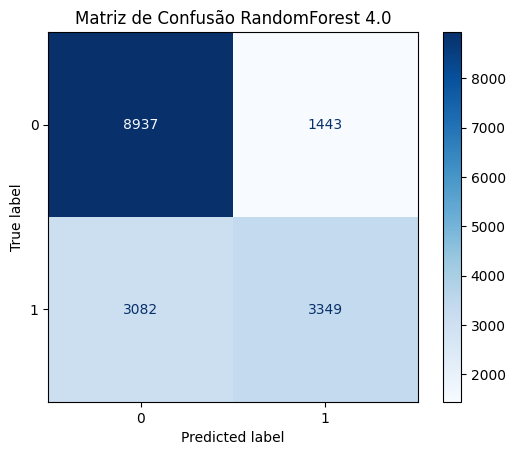

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Blues')

# Ajustando para um visual mais claro
plt.title("Matriz de Confusão RandomForest 4.0")
plt.show()

#### Segundo Treinamento

1.   Boa avaliação: **maior ou igual a nota 3.5**
2.   Má avaliação: **menor que 3.5**



In [ ]:
binarizer = Binarizer(threshold=3.5)
y_binary = binarizer.fit_transform(y.values.reshape(-1, 1)).ravel()
print(y_binary)

X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Avaliar o desempenho do modelo, relatório de classificação e matriz de confusão.
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))
print("\nMatriz de Confusão:\n", confusion_matrix(y_test, y_pred))

[1. 1. 1. ... 1. 1. 1.]
Acurácia do modelo: 0.88

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0       0.63      0.12      0.21      2043
         1.0       0.89      0.99      0.94     14768

    accuracy                           0.88     16811
   macro avg       0.76      0.56      0.57     16811
weighted avg       0.86      0.88      0.85     16811


Matriz de Confusão:
 [[  251  1792]
 [  148 14620]]


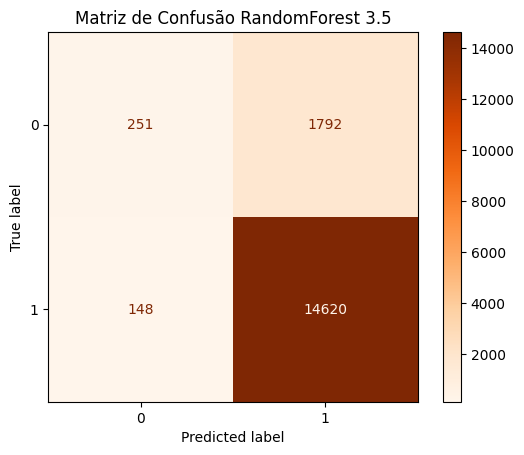

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=matrix)
fig, ax = plt.subplots()
disp.plot(ax=ax, cmap='Oranges')

# Ajustando para um visual mais claro
plt.title("Matriz de Confusão RandomForest 3.5")
plt.show()

### Avaliação do Modelo

Os resultados do RandomForest exemplificam algo bastante interessante. O primeiro treinamento, com Binarização na >= 4.0, gerou os seguintes resultados:

Na primeira execução, ele obteve em torno de 70% na determinação da classe 0 e classe 1, porém a capacidade de identificar corretamente a classe para as boas avaliações foi de 52%, enquanto as de má avaliação foi 86%. O F1 score da classe 0 foi satisfatoriamente 80%, diferente da classe 1, que foi exatamente 60%

  ![RF1](https://i.imgur.com/qect68a.png)


Abrangentemente falando, o treino consegue uma boa precisão, mas ainda demonstra certa confusão para identificar livros com boa avaliação corretamente, resultando num aumento de **Falsos Negativos** (previu que não é, mas na verdade é de boa avaliação).

*   Verdadeiros Negativos: 8937
*   Falsos Positivos: 1443
*   Falsos Negativos: 3082
*   Verdadeiros Positivos: 3349

De forma geral, o primeiro treino já demonstra métricas razoávelmente boas.



---



No segundo treino, onde o parâmetro de boa avaliação foi ajustado para >= 3.5, o RandomForest de forma geral possuiu:


*   88% de acurácia
*   89% de precisão
*   99% de recall
*   93% de F1-score

As métricas de forma geral foram muito satisfatórias, pois conseguiu prever a maioria dos livros de boa avaliação. Vale ressaltar que conforme visto na Análise Exploratória Adicional, boa parte dos dados são notas acima de 3.5, o que explica esse aglomerado de **Verdadeiros Positivos**.



*   Verdadeiros Negativos: 251
*   Falsos Positivos: 1792
*   Falsos Negativos: 148
*   Verdadeiros Positivos: 14620





  ![RF2](https://i.imgur.com/FWAxoM3.png)


As medidas de classes mostram que o algoritmo não teve dificuldades para determinar que o livro possuia boa avaliação.

  ![ComparativoGeral](https://i.imgur.com/iH5Tthd.png)


  ![ComparativoGeral](https://i.imgur.com/4hRxPNj.png)


#### Comparação com Regressão Logística

Nas tabelas abaixo é disponibilizado um panorama geral comparativo do treinamento de Regressão Logística e Random Forest.


*   Comparação quando a boa avaliação é maior ou igual a 4
*   Comparação quando a boa avaliação é maior ou igual a 3.5



  ![ComparativoGeral](https://i.imgur.com/2IYhl0t.png)


  ![ComparativoGeral](https://i.imgur.com/9sOKluz.png)


O RF contra a Regessão Logística na primeira tabela comprova que a aplicação do modelo é mais assertiva quando tenta-se prever uma boa avaliação quando o parâmetro rating é 4, resultando em métricas melhores e quantidade de predições maior.

Na segunda comparação, os modelos possuem resultados bem próximos, diferenciando apenas 1% na acurácia e precisão.

**Portanto, para previsão onde o parâmetro de boa nota é 4, o RandomForest se torna mais viável.**

---

**Caso o parâmetro de boa nota seja 3.5, ambos os modelos se tornam interessante em sua aplicação. Entretanto, a Regressão Logístia deve ser parametrizada com 1000 iterações (conforme Treinamento 3 na tabela de avaliação de Regressão Logística) para alcançar um resultado tão satisfatório quanto o RF.**